##**Introduction**
This code simulates the action potential propagation in an axon using Brian2, a neural simulation package in Python.

##**Importing Libraries**
The first line of the code imports the required libraries, which include the Brian2 library.

###Defining the Morphology of the Neuron
The second line defines the morphology of the neuron using the Cylinder function from Brian2. The cylinder represents the axon, with a length of 10 cm, diameter of 476 µm, and 1000 segments.

###Defining Parameters and Equations
The following lines define the parameters and equations for the neuron simulation. The parameters include the resting potential, the reversal potentials for sodium and potassium ions, the conductances for leak, sodium, and potassium ions, and the voltage-dependent rate constants for sodium and potassium ion channels. The equations describe the current and rate dynamics of the neuron, including the distributed transmembrane current, the point current, and the rate dynamics for the ion channels.

###Creating the Neuron
The SpatialNeuron function creates the neuron object using the defined morphology and equations, with a capacitance of 1 µF/cm^2 and an internal resistance of 35.4 Ω·cm. The initial values for the voltage and rate dynamics are also set.

###Running the Simulation
The StateMonitor function records the voltage and rate dynamics of the neuron during the simulation. The run function simulates the neuron's behavior for 50 ms with no external current, then applies a 1 µA current injection at one end of the axon for 3 ms, and finally simulates the neuron's behavior for another 100 ms without external current. The simulation results are recorded in the M and N objects.

###Plotting the Results
The final lines of the code plot the results of the simulation. The first plot shows the membrane potential as a function of position along the axon, with a time step of 5 ms. The second plot shows the membrane potential as a function of time for one segment of the axon.

##Code Explanation
*   The first code block is importing the required libraries for the simulation and initializing the simulation scope.
*   Then it defines the morphology of a cylinder, which represents an axon, using the Cylinder method from Brian2. The cylinder has a length of 10 cm, a diameter of 476 µm, and 1000 segments.
*   Next, the block defines the values of the ion channel parameters such as the resting potential (El), the reversal potentials of sodium and potassium (ENa and EK), and the conductance of various ion channels (gl, gNa0, gK).
*   After that, the block defines the equations that govern the behavior of the neuron using the eqs variable. The equation includes transmembrane current (Im) and the voltage-dependent gating variables (m, n, h) for the sodium and potassium channels.
*   Next, the block creates a SpatialNeuron object with the given morphology and equations. It also sets the initial values of the neuron's parameters such as voltage (v), gating variables (m, n, h), and applied current (I).


In [ ]:
!pip install brian2
import warnings
warnings.filterwarnings('ignore')

Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in < 1s
Starting simulation at t=53. ms for a duration of 100. ms
100. ms (100%) simulated in < 1s


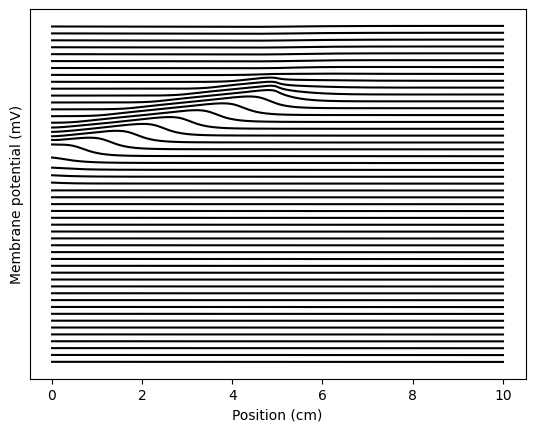

Text(0.5, 0, 'Time (ms)')

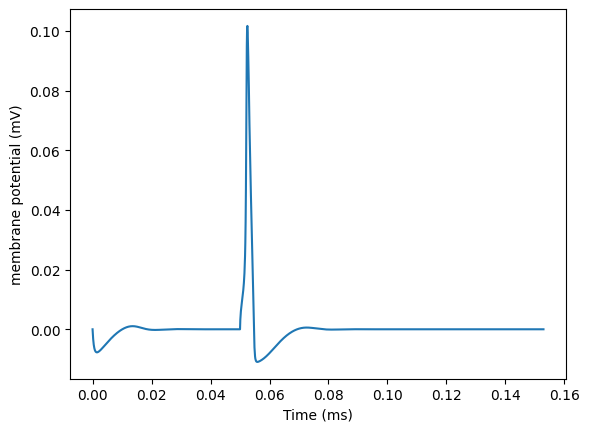

In [5]:
from brian2 import *
start_scope()
morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=1*uF/cm**2,
                       Ri=35.4*ohm*cm, method="exponential_euler")
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0
neuron.gNa = gNa0
neuron[5*cm:10*cm].gNa = 0*siemens/cm**2
M = StateMonitor(neuron, 'v', record=True)
N=StateMonitor(neuron, 'h', record=True)
run(50*ms, report='text')
neuron.I[0] = 1*uA  # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(100*ms, report='text')
for i in range(75, 125, 1):
    plot(cumsum(neuron.length)/cm, i+(1./60)*M.v[:, i*5]/mV, 'k')
yticks([])
ylabel('Membrane potential (mV)')
xlabel('Position (cm)')
axis('tight')
show()
plot(M.t,M.v[1])
ylabel("membrane potential (mV)")
xlabel("Time (ms)")

##**Objective**
The purpose of this code is to plot the rate constants (alpha and beta) and n-infinity for the potassium ion channel in a neuron as a function of the membrane potential.

##**Code Flow**


*   The membrane potential values are generated in a list called v using the range function, which will produce values from -110 to 59.
*   Three empty lists, list1, list2, and list3, are initialized.


*   A for loop is used to iterate through each value in v:
alphan and betan are calculated based on the membrane potential value.
ni is calculated based on alphan and betan.
*   The values of alphan, betan, and ni are appended to list1, list2, and list3, respectively.


*   Two subplots are created, one above the other, using subplot.
*   In the top subplot, list1 and list2 are plotted against v with labels and a legend.


*   The x and y labels for the top subplot are added using xlabel and ylabel.
In the bottom subplot, list3 is plotted against v.
*   The x and y labels for the bottom subplot are added using xlabel and ylabel.




##**Output**
The output is a figure with two subplots. The top subplot shows the rate constants (alpha and beta) for the potassium ion channel in a neuron as a function of the membrane potential. The bottom subplot shows the n-infinity for the potassium ion channel in a neuron as a function of the membrane potential. The x-axis for both subplots is the membrane potential in mV, and the y-axis for the top subplot is the rate constant in ms^-1, while the y-axis for the bottom subplot is the n-infinity.

Text(0, 0.5, 'n-infinity')

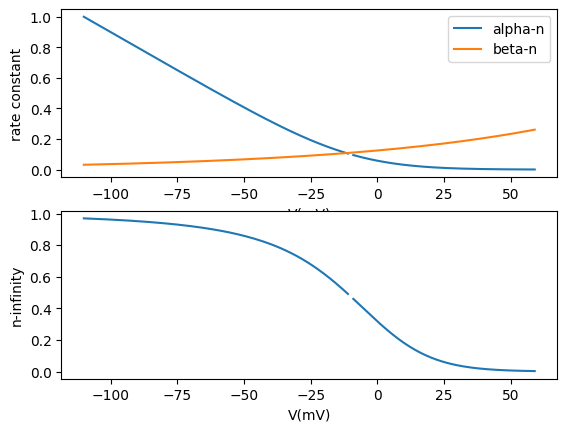

In [6]:
v=range(-110,60)
list1=[]
list2=[]
list3=[]
for i in range(-110,60):
    alphan = (0.01)*(i+10)/(exp((i+10)/10)-1)
    betan=0.125*exp(i/80)
    ni=alphan/(alphan+betan)
    list1.append(alphan)
    list2.append(betan)
    list3.append(ni)
subplot(211)    
plt.plot(v,list1,label="alpha-n")
plt.plot(v,list2,label="beta-n")
plt.legend()
xlabel('V(mV)')
ylabel('rate constant')
subplot(212)
plot(v,list3)
xlabel('V(mV)')
ylabel('n-infinity')

(0.0, 5.0)

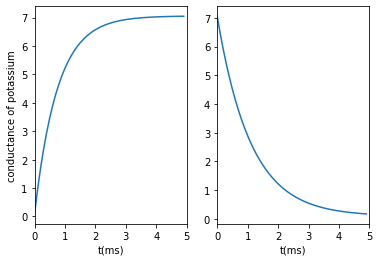

In [ ]:
# gki and gk0 are initial and final values of conductance of potassium ion channels, respectively. tau is the time constant for the change in conductance.
# t is a numpy array of time steps ranging from 0 to 5 with an interval of 0.1.
import numpy as np
gki=7.06
gk0=0.09
tau=0.75
t=np.arange(0.0,5.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)
subplot(121)    
plot(t,list)
xlabel('t(ms)')
xlim([0,5])
ylabel('conductance of potassium')
import numpy as np
gki=0.09
gk0=7.06
tau=1.1
t=np.arange(0.0,5.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)
subplot(122)    
plot(t,list)
xlabel('t(ms)')
xlim([0,5])

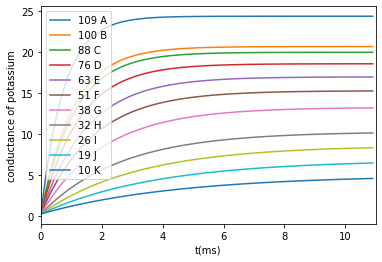

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gki=24.41
gk0=0.24
tau=0.75
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)
plt.plot(t,list,label="109 A")

gki=20.70
gk0=0.24
tau=1.05
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="100 B")

gki=20.00
gk0=0.24
tau=1.1
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="88 C")

gki=18.6
gk0=0.24
tau=1.25
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="76 D")

gki=17.00
gk0=0.24
tau=1.50
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="63 E")

gki=15.30
gk0=0.24
tau=1.70
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="51 F")

gki=13.27
gk0=0.24
tau=2.05
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="38 G")

gki=10.29
gk0=0.24
tau=2.6
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="32 H")

gki=8.62
gk0=0.24
tau=3.2
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="26 I")

gki=6.84
gk0=0.24
tau=3.8
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="19 J")

gki=5.0
gk0=0.24
tau=4.5
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="10 K")
xlabel('t(ms)')
xlim([0,11])
ylabel('conductance of potassium')
plt.legend()

Text(0, 0.5, 'h-infinity')

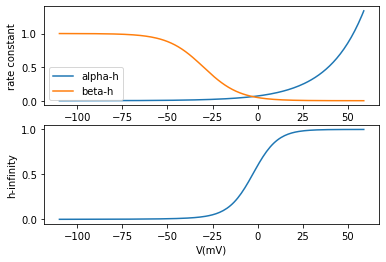

In [ ]:
v=range(-110,60)
import matplotlib.pyplot as plt
list1=[]
list2=[]
list3=[]
for i in range(-110,60):
    alphah = 0.07*exp(i/20)
    betah=1/(exp((i+30)/10)+1)
    hi=alphah/(alphah+betah)
    list1.append(alphah)
    list2.append(betah)
    list3.append(hi)
subplot(211)    
plt.plot(v,list1,label="alpha-h")
plt.plot(v,list2,label="beta-h")
plt.legend()
xlabel('V(mV)')
ylabel('rate constant')
subplot(212)
plot(v,list3)
xlabel('V(mV)')
ylabel('h-infinity')
